# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1706661639427.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,01/29/2024,4927.93,4892.95,4929.31,4887.40
1,01/26/2024,4890.97,4888.91,4906.69,4881.47
2,01/25/2024,4894.16,4886.66,4898.15,4869.34
3,01/24/2024,4868.55,4888.56,4903.68,4865.94
4,01/23/2024,4864.60,4856.80,4866.48,4844.37
...,...,...,...,...,...
2527,02/05/2014,1751.64,1753.38,1755.79,1737.92
2528,02/04/2014,1755.20,1743.82,1758.73,1743.82
2529,02/03/2014,1741.89,1782.68,1784.83,1739.66
2530,01/31/2014,1782.59,1790.88,1793.88,1772.26


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2532.000000,2532.000000,2532.000000,2532.000000
mean,3021.920363,3008.590964,3024.889585,2991.190273
std,909.337357,936.677939,942.880957,930.531040
min,1741.890000,0.000000,0.000000,0.000000
25%,2126.605000,2127.375000,2132.970000,2119.897500
50%,2802.935000,2804.450000,2815.125000,2790.580000
75%,3919.730000,3918.690000,3951.232500,3898.435000
max,4927.930000,4892.950000,4929.310000,4887.400000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3028.314245,3027.723498,3044.125767,3010.212150
std,908.644813,908.292990,914.384865,902.282657
min,1741.890000,1743.820000,1755.790000,1737.920000
25%,2135.807500,2132.770000,2145.637500,2125.927500
50%,2809.380000,2810.055000,2823.100000,2795.065000
75%,3926.287500,3920.875000,3955.915000,3901.837500
max,4927.930000,4892.950000,4929.310000,4887.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2531
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

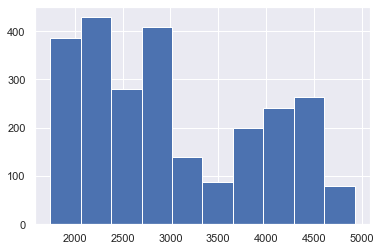

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4927.93

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3028.3142448330755

In [10]:
close_sd = df['Close/Last'].std()
close_sd

908.6448130084176

In [11]:
sigma1 = close_mean + close_sd
sigma1

3936.959057841493

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4845.603870849911

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5299.9262773541195

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2531
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-01-30 to 2024-01-29')

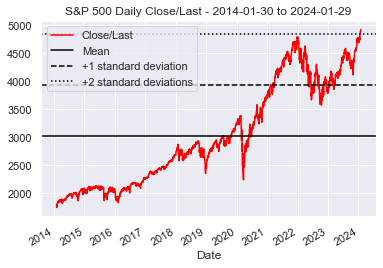

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-01-30 to 2024-01-29')

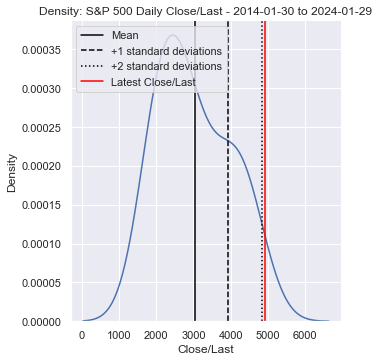

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.0906032015717093

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results